## Practice

'../../assets/Datasets/jones_gabriel.zip'을 이용하여 얼굴 인식을 구현하세요.

LBPH 알고리즘과 CNN Dlib을 이용하여 각각 구현하고 그 정확도를 비교해봅시다.

## 1. LBPH 알고리즘

### 1.1. Pre-requisites

zipfile 라이브러리를 이용해서 압축파일을 해제하세요.

In [2]:
import zipfile

zip_object = zipfile.ZipFile(file='../../assets/Datasets/jones_gabriel.zip', mode='r')
zip_object.extractall('./')
zip_object.close()

#### 1.1.1. list-up

데이터셋의 리스트업을 준비하세요

In [31]:
import os
import numpy as np
from PIL import Image

paths = [os.path.join('jones_gabriel/', f) for f in os.listdir('jones_gabriel/')]
paths = [f.replace('\\', '/') for f in paths]

ids = []
faces = []

for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    
    # person.대상(1자리수).인덱스(1~2자리수).jpg
    id = int(os.path.split(path)[1][7:8])
    
    ids.append(id)
    faces.append(image_np)
    
ids = np.array(ids)

### 1.2. LBPH Model 학습

In [32]:
print(ids[0], type(ids[0]))

1 <class 'numpy.int32'>


In [33]:
import cv2

lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(src=faces, labels=ids)
lbph_classifier.save('prac_lbph_classifier.pyml')

#### 1.2.1. LBPH Model 검증

In [50]:
predictations = []
expected_outputs = []

for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image)
    
    predictation, _ = lbph_classifier.predict(image_np)
    expectation = int(os.path.split(path)[1][7:8])

    predictations.append(predictation)
    expected_outputs.append(expectation)
    
predictations = np.array(predictations)
expected_outputs = np.array(expected_outputs)

#### 1.2.2. LBPH Model 신뢰도 평가

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictations)

1.0

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictations)
print(cm)

[[25  0]
 [ 0 25]]


<AxesSubplot:>

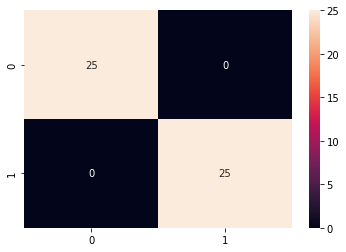

In [59]:
import seaborn

seaborn.heatmap(cm, annot=True)

## 2. CNN Dlib

1. Detect Facial Points
2. Detecting Facial Descriptor
3. Calculating the distance between faces
4. Detecting faces with Dlib
5. Threshold

### 2.1. Detect Facial Points

In [63]:
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

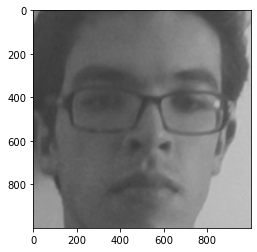

In [ ]:
img = cv2.imread('./jones_gabriel/person.2.3.jpg')
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(cvt_img, (1000, 1000))

light = 50
lightened_filter = np.full(resized_img.shape, (light, light, light), dtype=np.uint8)
lightened_img = cv2.add(resized_img.copy(), lightened_filter)

face_detector = dlib.get_frontal_face_detector()
face_detection = face_detector(lightened_img, 1)

for face in face_detection:
    
    pt1, pt2 = (face.left(), face.top()), (face.right(), face.bottom())
    cv2.rectangle(lightened_img, pt1, pt2, (255, 255, 0), 1)

# plt.figure(figsize=(100,50))
plt.imshow(lightened_img)

### 2.2. Fail

이 강의를 든는 2023-02-07에는 CNN Dlib 추가 학습법을 알지 못합니다. <br>
또한, 위에서보듯이 dlib.get_frontal_face_detector()가 정상적으로 얼굴을 잡지 못하고 있습니다.<br>

해당 교육과정의 본질인 **전체적인 맥락을 훑어본다**에 위반되는 것 같아서 일단 스킵하고 별도의 **사이드 프로젝트**에서 이를 구현하도록 하겠습니다.